In [5]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import seaborn as sns

%matplotlib inline
df= pd.read_csv('../../data/01_raw_data/d-line/dline.csv')
colnames = list(df.columns[1:-1])
df.head()

,Unnamed: 0,Player,G,GS,Int,Yds,IntTD,Lng,PD,FF,...,Yds.1,FRTD,Sk,Comb,Solo,Ast,TFL,QBHits,Sfty,Awards
0,0,Ethan Westbrooks,1,0,0,0,0,0,0,0,...,0,0,0.0,1,1,0,0,0,0,0
1,1,Nick Thurman,1,0,0,0,0,0,0,0,...,0,0,0.0,1,1,0,0,1,0,0
2,2,Za'Darius Smith,1,0,0,0,0,0,0,0,...,0,0,0.0,1,1,0,0,0,0,0
3,3,Jabaal Sheard,1,0,0,0,0,0,0,0,...,0,0,0.0,1,0,1,0,0,0,0
4,4,Freedom Akinmoladun,1,0,0,0,0,0,0,0,...,0,0,0.0,2,2,0,0,0,0,0


In [15]:
features = ["G", "Comb", "Solo", "Ast", "TFL", "Sk", "Int", "FF", "FR", "PD","QBHits", "Awards"]
X = df[features]

# Scale Features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

kmeans = KMeans(n_clusters=3, random_state=42)
df["Cluster"] = kmeans.fit_predict(X_scaled)
df["Cluster_Label"] = df["Cluster"].map(
    {0: "Bad", 1: "Elite", 2: "Good"}
)  # Based on center analysis

print(df[["Player", "Cluster"]])
print("\nCluster Centers:")
print(pd.DataFrame(scaler.inverse_transform(kmeans.cluster_centers_), columns=features))

                  Player  Cluster
0       Ethan Westbrooks        0
1           Nick Thurman        0
2        Za'Darius Smith        0
3          Jabaal Sheard        0
4    Freedom Akinmoladun        0
..                   ...      ...
863      Milton Williams        2
864          Jonah Laulu        2
865    Johnathan Hankins        2
866         Bryan Bresee        2
867     Nnamdi Madubuike        1

[868 rows x 2 columns]

Cluster Centers:
           G       Comb       Solo        Ast        TFL        Sk       Int  \
0   6.845188   7.669456   3.757322   3.912134   0.688285  0.342050  0.006276   
1  16.049180  51.852459  30.655738  21.196721  10.098361  7.418033  0.163934   
2  15.118541  26.097264  13.790274  12.306991   3.331307  2.132219  0.045593   

         FF        FR        PD     QBHits        Awards  
0  0.037657  0.060669  0.198745   0.997908  5.551115e-17  
1  1.262295  0.622951  3.081967  17.721311  4.754098e-01  
2  0.382979  0.291793  1.066869   5.285714  0.000000

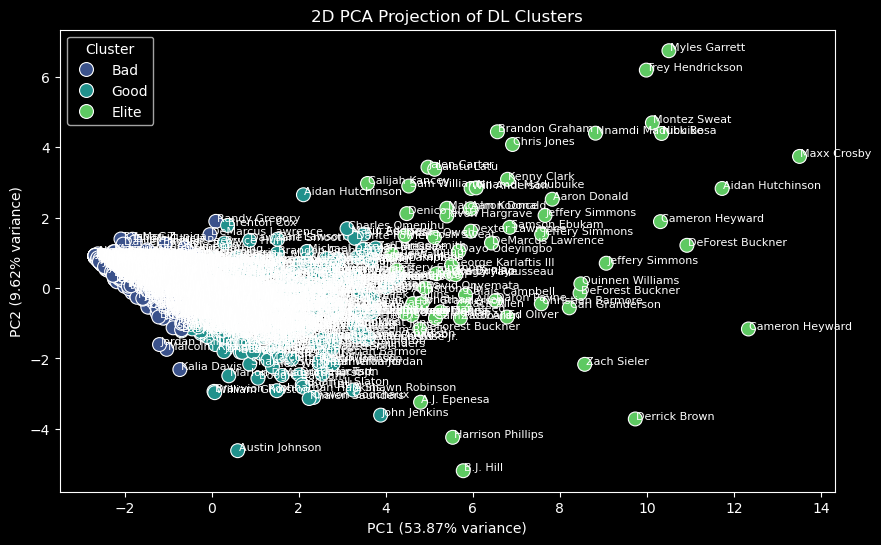

In [16]:
# PCA reduction
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Add to DF
df["PC1"] = X_pca[:, 0]
df["PC2"] = X_pca[:, 1]

# Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df, x="PC1", y="PC2", hue="Cluster_Label", palette="viridis", s=100
)
for i, row in df.iterrows():
    plt.text(row["PC1"] + 0.02, row["PC2"], row["Player"], fontsize=8)  # Label players
plt.title("2D PCA Projection of DL Clusters")
plt.xlabel(f"PC1 ({pca.explained_variance_ratio_[0]:.2%} variance)")
plt.ylabel(f"PC2 ({pca.explained_variance_ratio_[1]:.2%} variance)")
plt.legend(title="Cluster")
plt.show()

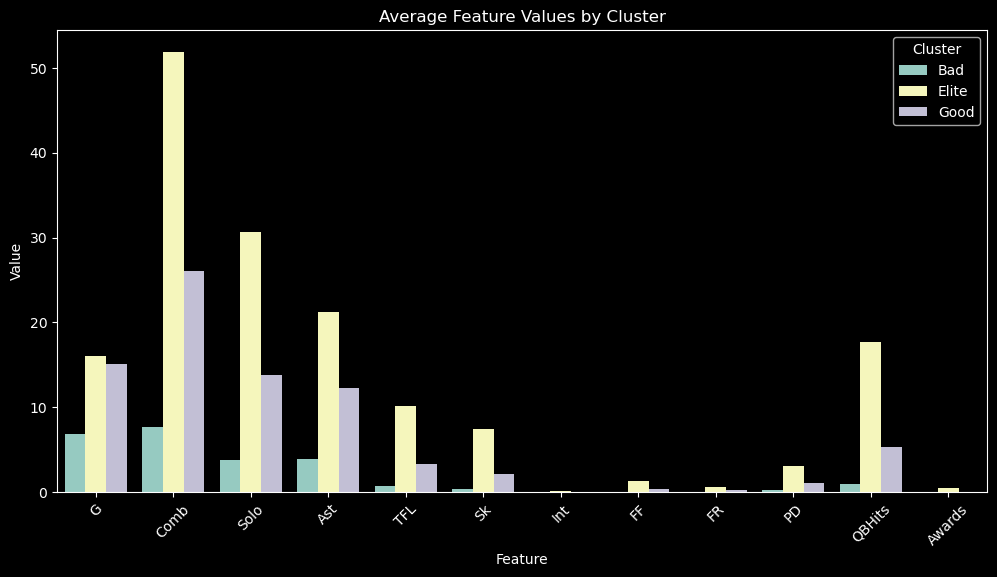

In [18]:
# Get centers (unscaled)
centers = pd.DataFrame(
    scaler.inverse_transform(kmeans.cluster_centers_), columns=features
)
centers["Cluster"] = ["Bad", "Elite", "Good"]  # Adjust based on your labels

# Melt for plotting
centers_melt = centers.melt(id_vars="Cluster", var_name="Feature", value_name="Value")

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(data=centers_melt, x="Feature", y="Value", hue="Cluster")
plt.title("Average Feature Values by Cluster")
plt.xticks(rotation=45)
plt.legend(title="Cluster")
plt.show()

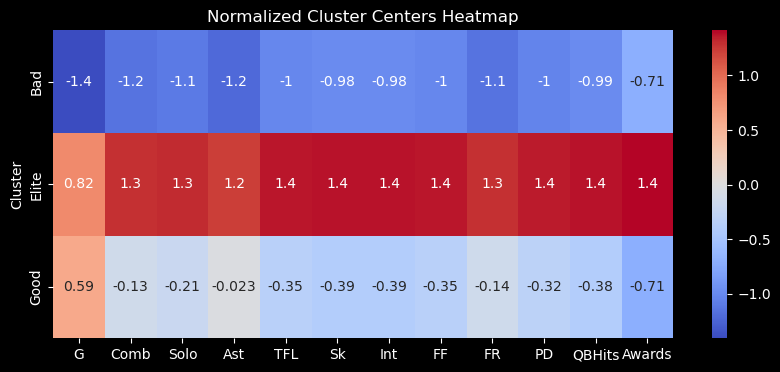

In [19]:
# Normalize centers for heatmap
centers_norm = pd.DataFrame(
    StandardScaler().fit_transform(centers.drop("Cluster", axis=1)),
    columns=features,
    index=centers["Cluster"],
)

# Plot
plt.figure(figsize=(10, 4))
sns.heatmap(centers_norm, annot=True, cmap="coolwarm", center=0)
plt.title("Normalized Cluster Centers Heatmap")
plt.show()